# Analysis of the Best Bounds

In this notebook, we now analyze the performance of the different experiment-wares in terms of the (intermediate) best bounds they found.
More precisely, we compare the experiment-wares based on the best values they can find, and how fast they find them.

## Imports

As usual, we start by importing the needed classes and constants from *Metrics-Wallet*.

In [1]:
from metrics.wallet import BasicAnalysis, OptiAnalysis
from metrics.wallet.analysis import borda_score, dominance_score, norm_bound_score, optimality_score

## Loading the data of the experiments

In a [dedicated notebook](load_experiments.ipynb), we already read and preprocessed the data collected during our experiments.
We can now simply reload the cached `BasicAnalysis` to retrieve it.

In [2]:
basic_analysis = BasicAnalysis.import_from_file('.cache')

Since `Sat4j` does not produce any timestamp, we cannot make the optimality analysis with this solver.
We thus remove it from the analysis.

In [3]:
basic_analysis = basic_analysis.remove_experiment_wares(['$Sat4j_{default}$'])

For the purpose of an optimization analysis, we need to provide an additional *sampling* parameter.
This sampling allows to divide the runtime of the experiment-wares in different steps, and to identify for each experiment-ware the best bound it has found at this step.

In [4]:
timeout = 1200
n_samples = 200
sampling = list(range(1, timeout, timeout // n_samples))

Since we now want to perform a more specific analysis, we need to create an `OptiAnalysis` from the `BasicAnalysis`, to get methods that are dedicated to the analysis of the bounds found on optimization problems.

In [5]:
analysis = OptiAnalysis(basic_analysis=basic_analysis, samp=sampling)

## Score computations

To draw plots dedicated to an optimization analysis, we need to compute the scores of each experiment-ware on each input.
These scores may be computed absolutely, or relatively to an experiment-ware that we call the *default experiment-ware*.
If such a default experiment-ware is to be used, its name should be set below.

In [6]:
default_xp_ware = None

We consider here the default scoring schemes provided by *Metrics*, namely:

+ `optimality`, which is equal to 1 if the experiment-ware has found an optimal bound, and 0 otherwise,
+ `dominance`, which is equal to 1 if the current bound is the best bound found so far for this input,
+ `norm_bound`, which is the normalization of the current bound, based on the current minimum and maximum values found for this input, and
+ `borda`, which is based on the Borda count method, and obtained by rating each experiment-ware for a given input.

You may use all these scores, or only some of them, by putting them or not in the dictionary below.

In [7]:
score_methods = {
    'optimality': optimality_score,
    'dominance': dominance_score,
    'norm_bound': norm_bound_score,
    'borda': borda_score
}

Let us now compute the scores of the experiment-wares.
This computation is made **for each input**, by rating the intermediate bounds found by **all the experiment-wares** considered in the analysis.

In [8]:
analysis.compute_scores(default_solver=default_xp_ware, score_map=score_methods)

## Plots

Now that we have computed the scores of the experiment-wares for each input, we can draw the corresponding plots.
They provide, for each experiment-ware, an aggregated view of the evolution of the quality of the bounds they found w.r.t. their runtime and the other experiment-wares.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Evolution of optimality scores'}, xlabel='Time (s)', ylabel='Optimality score'>)

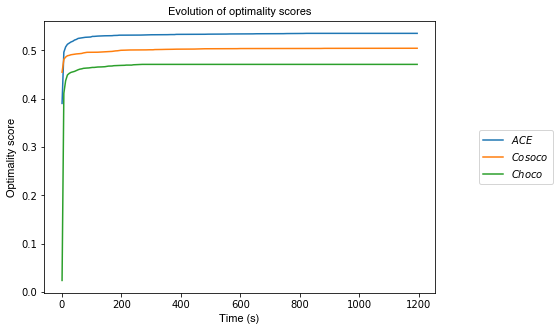

In [14]:
analysis.opti_line_plot(
    col='optimality' if default_xp_ware else 'optimality',
    show_marker=False,

    title='Evolution of optimality scores',
    x_axis_name='Time (s)',
    y_axis_name='Optimality score'
)

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Evolution of dominance scores'}, xlabel='Time (s)', ylabel='Dominance score'>)

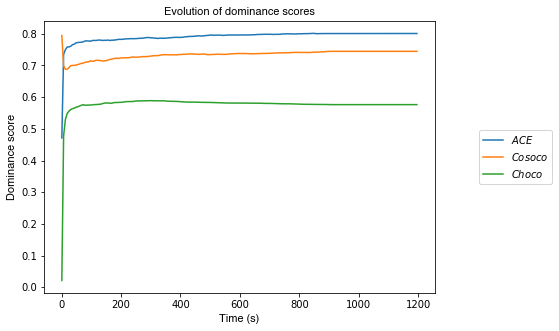

In [15]:
analysis.opti_line_plot(
    col='dominance' if default_xp_ware else 'dominance',
    show_marker=False,

    title='Evolution of dominance scores',
    x_axis_name='Time (s)',
    y_axis_name='Dominance score'
)

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Evolution of normalized bounds'}, xlabel='Time (s)', ylabel='Normalized bound'>)

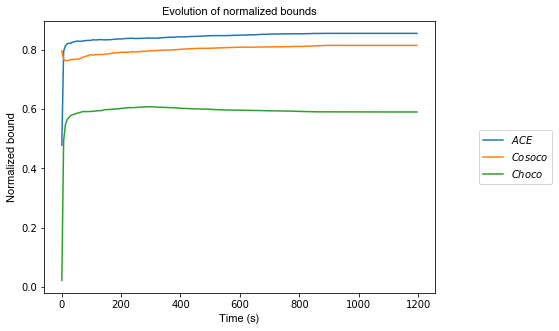

In [16]:
analysis.opti_line_plot(
    col='norm_bound' if default_xp_ware else 'norm_bound',
    show_marker=False,

    title='Evolution of normalized bounds',
    x_axis_name='Time (s)',
    y_axis_name='Normalized bound'
)

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Evolution of Borda scores'}, xlabel='Time (s)', ylabel='Borda score'>)

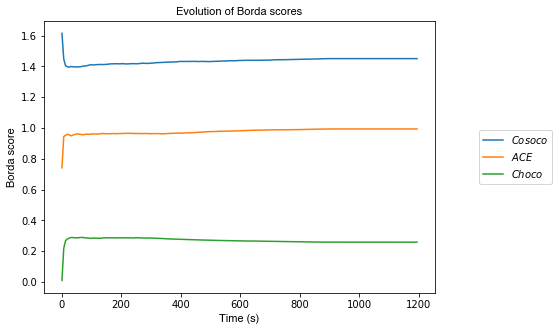

In [17]:
analysis.opti_line_plot(
    col='borda' if default_xp_ware else 'borda',
    show_marker=False,

    title='Evolution of Borda scores',
    x_axis_name='Time (s)',
    y_axis_name='Borda score'
)

The first three performance scores proposed here show a common order in the quality of the tested solvers: `ACE` shows better performance over the whole solving time (except for the first few seconds where `Cosoco` is more reactive). `Choco` shows lower performance than these two first solvers.

The last scoring method reverses the roles between `Ace` and `Cosoco`: the explanation linked to this effect comes from the importance given by the latter method to the reactivity of the solver when the bounds found are equal.